In [1]:
import warnings
warnings.filterwarnings('ignore')
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import pandas_profile

%matplotlib inline
# Importing dataset

leadInfo = pd.read_csv('Leads.csv', encoding = 'latin')
leadInfo.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2]:
# inspect leadInfo dataframe

print("*********************************  Info *******************************************") 
print(leadInfo.info())
print("*********************************  Shape ******************************************") 
print(leadInfo.shape)
print("**************************** Columns having null values *****************************")
print(leadInfo.isnull().any())
print("**************************** Describe *****************************")
leadInfo.describe()

*********************************  Info *******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [3]:
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [4]:
# Check if there are any duplicate values in the dataset

leadInfo[leadInfo.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [5]:
# Following columns have a value called select. Convert those values as nan since the customer has not selected any options for 
# these columns while entering the data.

# a) Specialization
# b) How did you hear about X Education
# c) Lead Profile
# d) City

# Converting 'Select' values to NaN.

leadInfo['Specialization'] = leadInfo['Specialization'].replace('Select', np.nan)
leadInfo['How did you hear about X Education'] = leadInfo['How did you hear about X Education'].replace('Select', np.nan)
leadInfo['Lead Profile'] = leadInfo['Lead Profile'].replace('Select', np.nan)
leadInfo['City'] = leadInfo['City'].replace('Select', np.nan)
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [6]:
# Let us drop the following columns that have more than 30% null values

# a) Specialization
# b) How did you hear about X Education
# c) Tags
# d) Lead Quality
# e) Lead Profile
# f) City
# g) Asymmetrique Activity Index
# h) Asymmetrique Profile Index
# i) Asymmetrique Activity Score
# j) Asymmetrique Profile Score

leadInfo = leadInfo.drop(['Specialization', 'How did you hear about X Education', 'Tags', 'Lead Quality',
                          'Lead Profile','City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                          'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)
# check for percentage of null values in each column after dropping columns having more than 30% null values

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [8]:
# Lets check the value counts for each values in the country column

leadInfo.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [9]:
# check the percentage of India as value in the country column

country_percentage = round(100*len(leadInfo[leadInfo['Country'] == 'India'])/len(leadInfo['Country']),2)
print(country_percentage)

70.26


In [10]:
# Since "India" occurs around 70% of times in the Country column, and country column also has around 27% as missing values, 
# we shall go ahead and drop the column

leadInfo = leadInfo.drop(['Country'], axis=1)

In [11]:
# Check the value counts for the column Lead Source

leadInfo['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [12]:
# From the above it can be noticed that Google appears twice with different cases. Hence we shall convert all rows with value 
# "Google" to the same case.
# Also since "Google" has the major chunk of data, we can impute the null values with Google

leadInfo['Lead Source'] = leadInfo['Lead Source'].replace('google', 'Google')
leadInfo['Lead Source'] = leadInfo['Lead Source'].replace(np.nan, 'Google')

In [13]:
# Check the value counts for the column Total Visits

leadInfo['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [14]:
# Check the median of column 

leadInfo['TotalVisits'].median()

3.0

In [15]:
# We shall impute the null values in TotalVisits by the median value which is 3.0

leadInfo['TotalVisits'] = leadInfo['TotalVisits'].replace(np.nan, leadInfo['TotalVisits'].median())
# Check the value counts for Page Views Per Visit

leadInfo['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [16]:
# Check the median of the column

leadInfo['Page Views Per Visit'].median()

2.0

In [17]:
# We shall impute the null values in 'Page Views Per Visit' by the median value which is 2.0

leadInfo['Page Views Per Visit'] = leadInfo['Page Views Per Visit'].replace(np.nan, leadInfo['Page Views Per Visit'].median())
# Check the value counts for the column Last Activity

leadInfo['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [18]:
# Since we do not have any information of what the last activity of the customer would have been, we can add a new category 
# called 'Not Sure' for the null values

leadInfo['Last Activity'] = leadInfo['Last Activity'].replace(np.nan, 'Not Sure')
# Check the value counts for the column "What is your current Occupation"

leadInfo['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [19]:
# Since no information has been provided Current Occupation, we can add a new category called No Information and set that 
# as value for the null columns

leadInfo['What is your current occupation'] = leadInfo['What is your current occupation'].replace(np.nan, 'No Information')
# Check the value counts for the column What matters most to you in choosing a course 

leadInfo['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [20]:
matters_most_percentage = round(100*len(leadInfo[leadInfo['What matters most to you in choosing a course'] 
                            == 'Better Career Prospects'])/len(leadInfo['What matters most to you in choosing a course']),2)
print(matters_most_percentage)

70.65


In [21]:
# Since Better Career Prospects occurs around 70% of times in the What matters most to you in choosing a course column, and
# since the column also has around 29% as missing values, we shall go ahead and drop the column

leadInfo = leadInfo.drop(['What matters most to you in choosing a course'], axis=1)
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [22]:
# Since the following columns have only one value "No" in all the rows, we can eliminate the columns :

# a) Magazine
# b) Receive More Updates About Our Courses
# c) Update me on Supply Chain Content
# d) Get updates on DM Content
# e) I agree to pay the amount through cheque

leadInfo = leadInfo.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)
leadInfo.shape

(9240, 20)

In [23]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


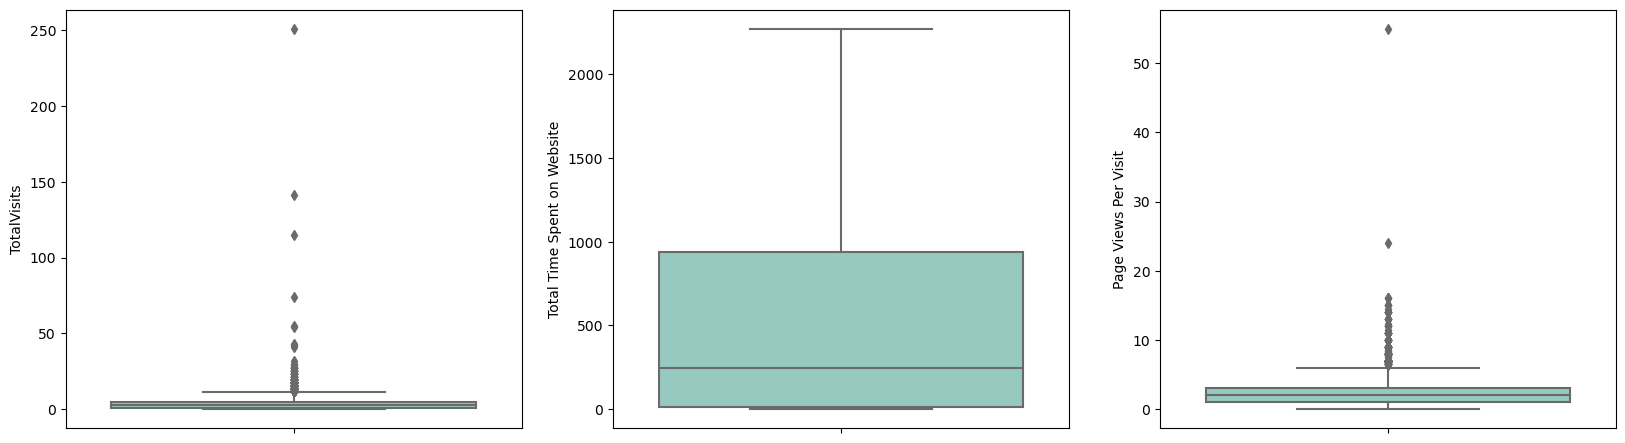

In [24]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = leadInfo)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = leadInfo)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = leadInfo)
plt.show()

In [25]:
# Removing values beyond 99% for Total Visits

nn_quartile_total_visits = leadInfo['TotalVisits'].quantile(0.99)
leadInfo = leadInfo[leadInfo["TotalVisits"] < nn_quartile_total_visits]
leadInfo["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [26]:
# Checking outliers at 25%,50%,75%,90%,95% and above

leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


In [27]:
# Removing values beyond 99% for page Views Per Visit

nn_quartile_page_visits = leadInfo['Page Views Per Visit'].quantile(0.99)
leadInfo = leadInfo[leadInfo["Page Views Per Visit"] < nn_quartile_page_visits]
leadInfo["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [28]:
# Checking outliers at 25%,50%,75%,90%,95% and above
leadInfo.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


In [29]:
# Determine the percentage of data retained

num_data = round(100*(len(leadInfo)/9240),2)
print(num_data)

97.72


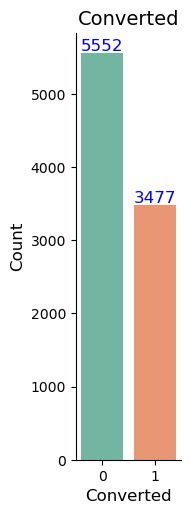

In [30]:
# Conversion Rate 

plot = sns.catplot(x="Converted", kind="count", data=leadInfo, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

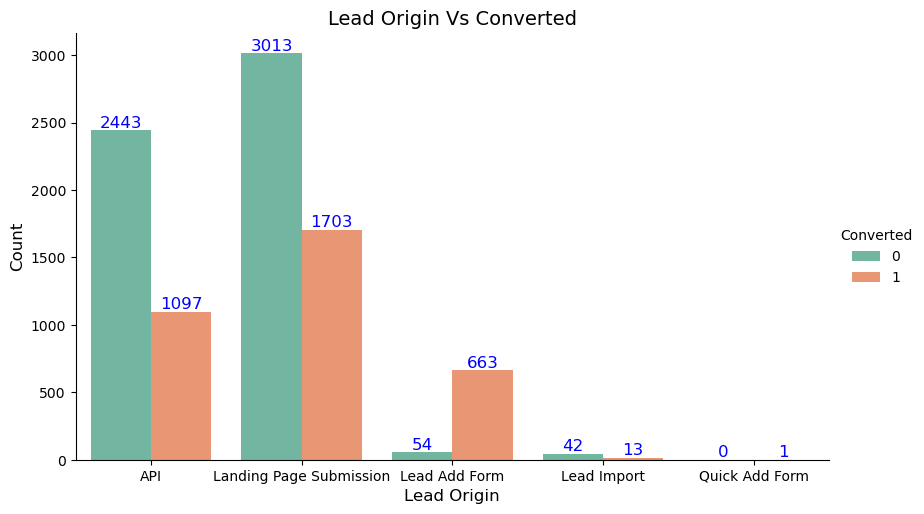

In [31]:
# Lead Origin

plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect= 1.7);

plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
    
plt.show()

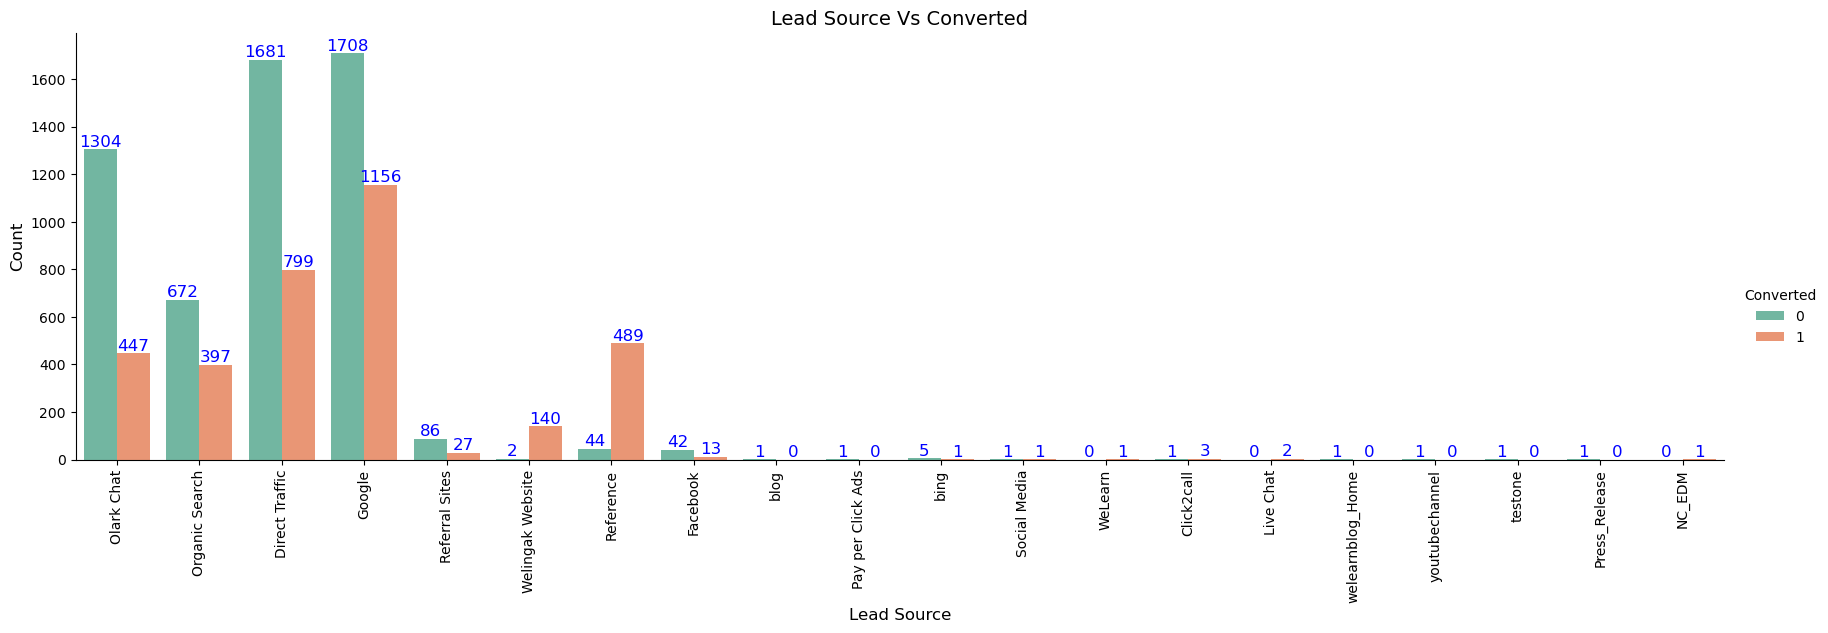

In [32]:
# Lead Source

plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')
   
plt.show()


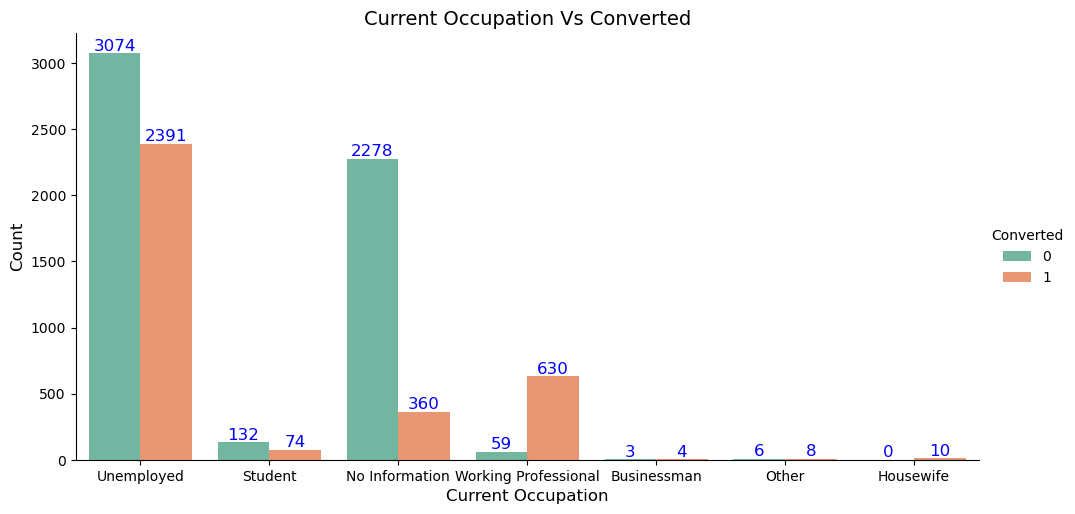

In [33]:
# What is your current occupation

plot = sns.catplot(x="What is your current occupation", hue = "Converted", kind="count", data=leadInfo, palette="Set2", 
                   aspect = 2.0);

plt.title('Current Occupation Vs Converted', fontsize = 14)
plt.xlabel("Current Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

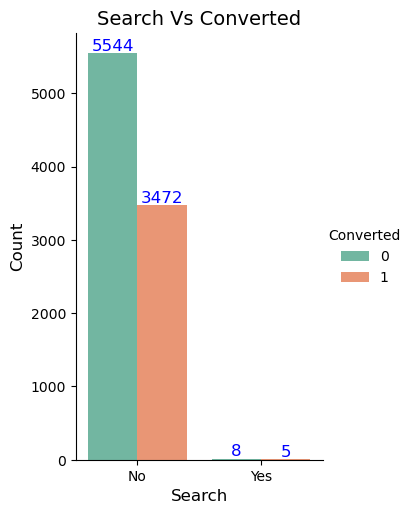

In [34]:
# Search

plot = sns.catplot(x="Search", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Search Vs Converted', fontsize = 14)
plt.xlabel("Search", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

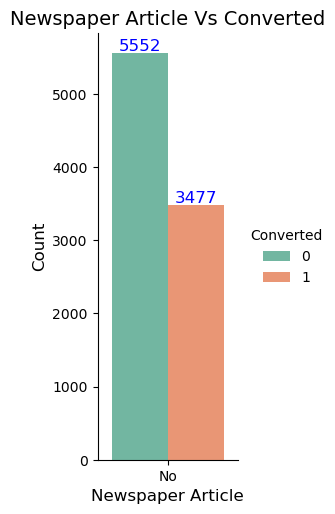

In [35]:
# Newspaper Article

plot = sns.catplot(x="Newspaper Article", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.5);

plt.title('Newspaper Article Vs Converted', fontsize = 14)
plt.xlabel("Newspaper Article", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

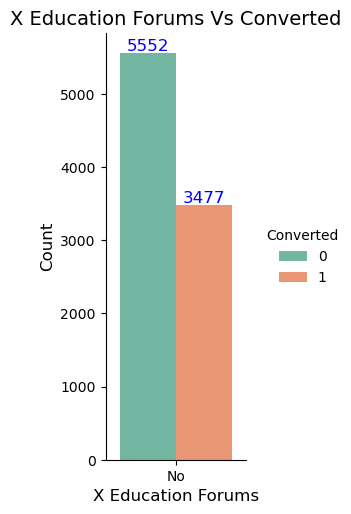

In [36]:
# Dropping Newspaper Article

leadInfo = leadInfo.drop(['Newspaper Article'], axis=1)
# X Education Forums

plot = sns.catplot(x="X Education Forums", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.5);

plt.title('X Education Forums Vs Converted', fontsize = 14)
plt.xlabel("X Education Forums", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

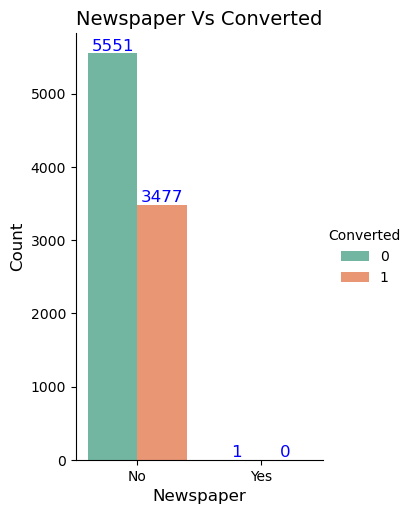

In [37]:
# Dropping X Education Forum column

leadInfo = leadInfo.drop(['X Education Forums'], axis=1)
plot = sns.catplot(x="Newspaper", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Newspaper Vs Converted', fontsize = 14)
plt.xlabel("Newspaper", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

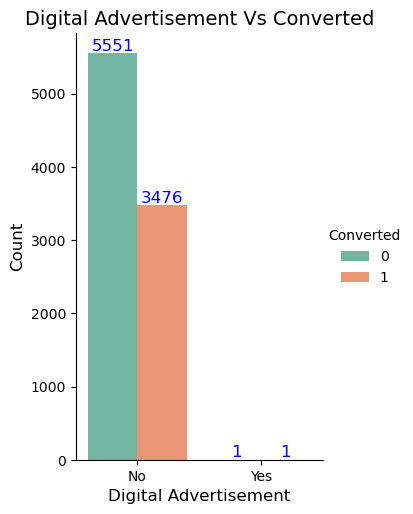

In [38]:
# Dropping Newspaper column

leadInfo = leadInfo.drop(['Newspaper'], axis=1)
# Digital Advertisement

plot = sns.catplot(x="Digital Advertisement", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Digital Advertisement Vs Converted', fontsize = 14)
plt.xlabel("Digital Advertisement", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

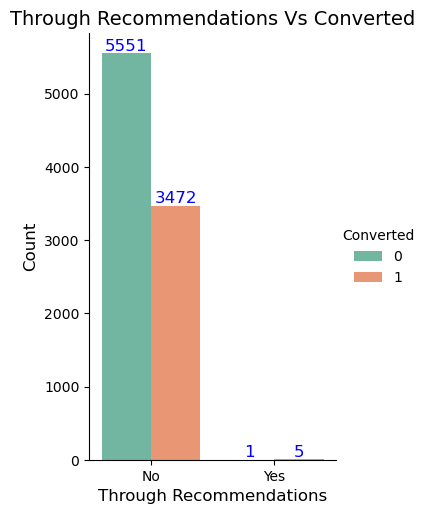

In [39]:
# Through Recommendations

plot = sns.catplot(x="Through Recommendations", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 0.7);

plt.title('Through Recommendations Vs Converted', fontsize = 14)
plt.xlabel("Through Recommendations", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

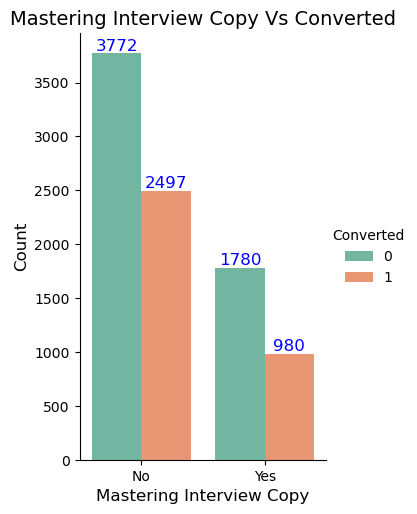

In [40]:
# A free copy of Mastering The Interview

plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=leadInfo, palette="Set2",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

ax = plot.facet_axis(0,0)
for p in ax.patches:        
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

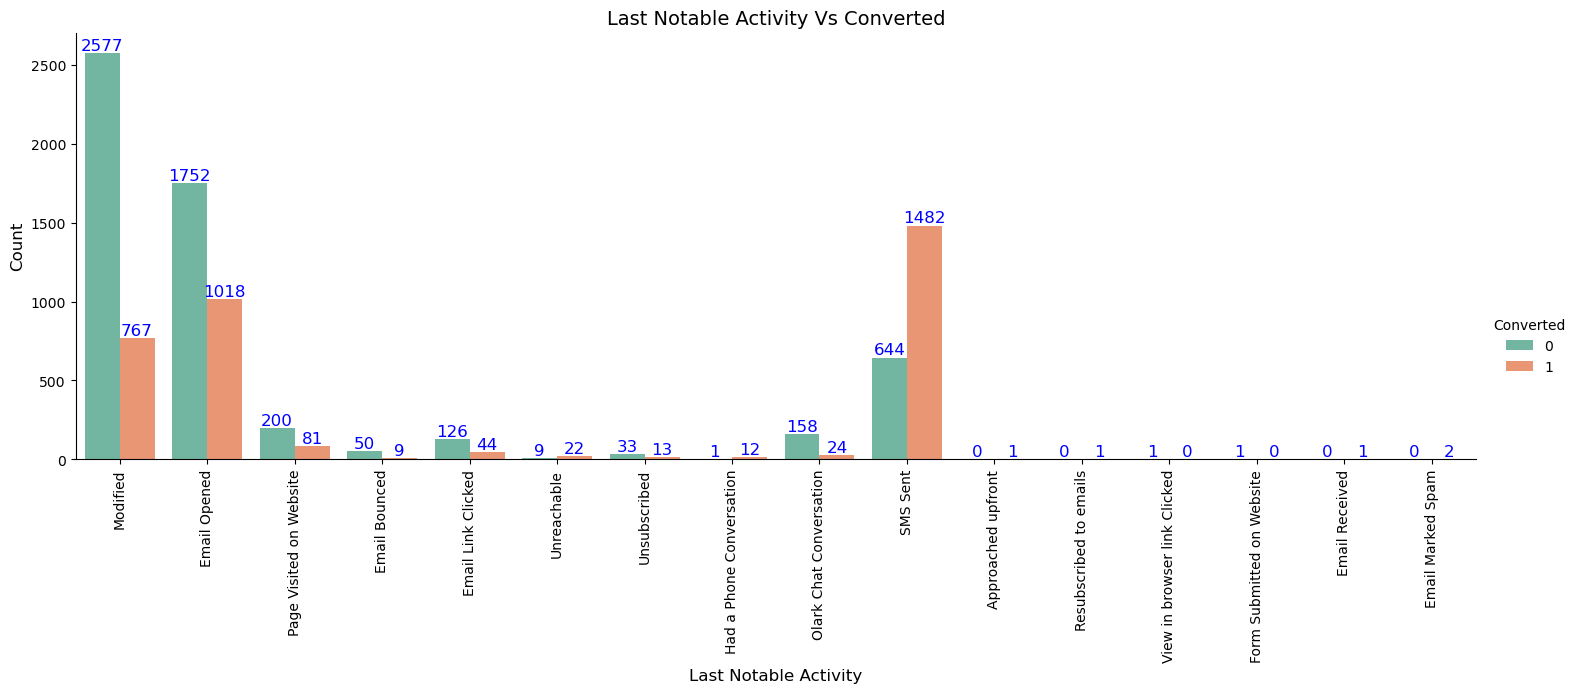

In [41]:
# Last Notable Activity

plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=leadInfo, palette="Set2", aspect = 3.0);

plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)

# Print the counts

ax = plot.facet_axis(0,0)
for p in ax.patches:
    
    if np.isnan(p.get_height()):
        height = 0
    else:
        height = p.get_height()
    
    height = int(height)
    ax.text(p.get_x()+p.get_width()/2., height, height, fontsize=12, color='blue', ha='center', va='bottom')

plt.show()

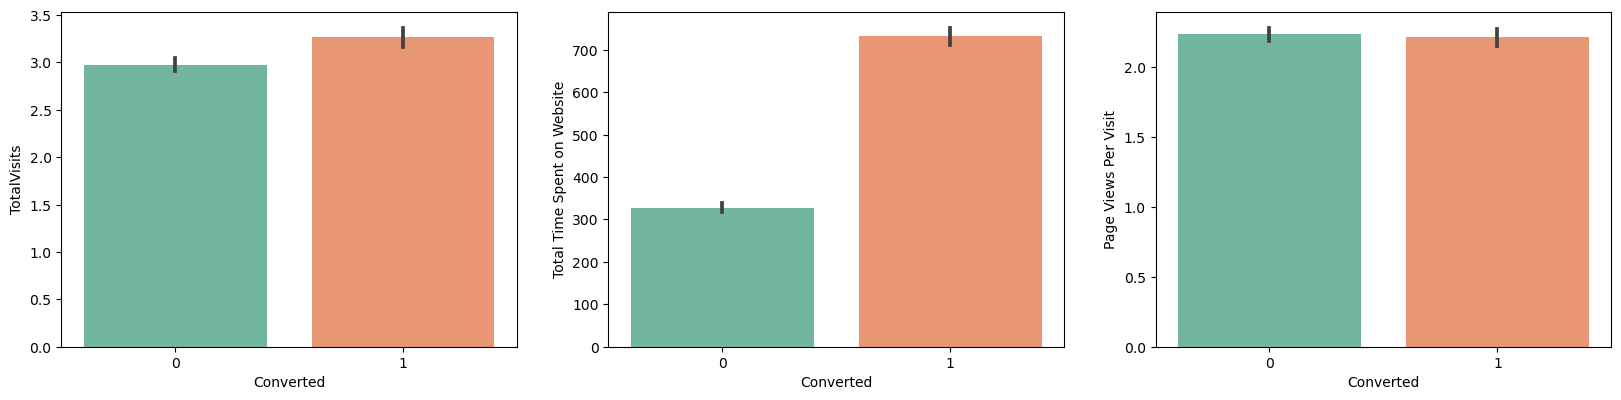

In [42]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = leadInfo)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = leadInfo)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = leadInfo)
plt.show()

# Data Preparation - Creating Dummies 

In [43]:
variablelist =  variablelist =  ['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 'Through Recommendations', 
                                 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leadInfo[variablelist] = leadInfo[variablelist].apply(binary_map)
# Creating dummies for the following columns below

# Lead Origin : 

d_lead_origin = pd.get_dummies(leadInfo['Lead Origin'], prefix='LeadOrigin')
# Dropping quick Add Form column
d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo, d_lead_origin1], axis = 1)

# Lead Source :

d_lead_source = pd.get_dummies(leadInfo['Lead Source'], prefix='LeadSource')
# Dropping blog column
d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_lead_source1], axis=1)

# last Activity

d_last_activity = pd.get_dummies(leadInfo['Last Activity'], prefix='LastActivity')
# Dropping Resubscribed to emails column
d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_last_activity1], axis=1)

# What is your current occupation

d_curr_occupation = pd.get_dummies(leadInfo['What is your current occupation'], prefix='CurrentOccupation')
# Dropping No Information column
d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_curr_occupation1], axis=1)

# Last Notable Activity

d_last_notable_activity = pd.get_dummies(leadInfo['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leadInfo = pd.concat([leadInfo,d_last_notable_activity1], axis=1)

leadInfo.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,1,0,0,0,0,0,0


In [44]:
# Remove following columns from the leadInfo

# a) Prospect ID
# b) Lead Numbers
# c) Lead Origin
# d) Lead Source
# e) Last Activity
# f) What is your current occupation
# g) Last Notable Activity

leadInfo = leadInfo.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)
leadInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [45]:
# check for percentage of null values in each column

percent_missing = round(100*(leadInfo.isnull().sum()/len(leadInfo.index)), 2)
print(percent_missing)

Do Not Email                                        0.0
Do Not Call                                         0.0
Converted                                           0.0
TotalVisits                                         0.0
Total Time Spent on Website                         0.0
                                                   ... 
LastNotableActivity_Page Visited on Website         0.0
LastNotableActivity_SMS Sent                        0.0
LastNotableActivity_Unreachable                     0.0
LastNotableActivity_Unsubscribed                    0.0
LastNotableActivity_View in browser link Clicked    0.0
Length: 71, dtype: float64


In [46]:
# check shape of the data frame

leadInfo.shape

(9029, 71)

In [47]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X

X = leadInfo.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [48]:
# Putting response variable to y

y = leadInfo['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [49]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)


# Rescaling the features with MinMax scaling 

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [51]:
### Checking the Conversion Rate percentage

converted = (sum(leadInfo['Converted'])/len(leadInfo['Converted'].index))*100
converted

38.50924797873519

# Model Building


In [52]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6259
Model Family:                Binomial   Df Model:                           60
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 26 Feb 2023   Deviance:                   1.4110e+05
Time:                        18:58:45   Pearson chi2:                 6.90e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             7.985e+14    6.4e+07   1.25e+07      0.000    7.99e+14    7.99e+14
Do Not Email                                     -5.058e+14   4.48e+06  -1.13e+08      0.000   -5.06e+14   -5.06e+14
Do Not Call                                       2.033e+15   4.76e+07   4.27e+07      0.000    2.03e+15    2.03e+15
TotalVisits                                      -5.288e+14   7.66e+06  -6.91e+07      0.000   -5.29e+14   -5.29e+14
Total Time Spent on Website                       3.408e+15   4.01e+06   8.49e+08      0.000    3.41e+15    3.41e+15
Page Views Per Visit                               4.46e+13   6.53e+06   6.83e+06      0.000    4.46e+13    4.46e+13
Search                                           -3.836e+14   2.44e+07  -1.57e+07      0.000   -3.84e+14   -3.84e+14
Digital Advertisement                             2.206e+14   4.76e+07   4.64e+06      0.000    2.21e+14    2.21e+14
Through Recommendations                          -3.923e+14    4.2e+07  -9.33e+06      0.000   -3.92e+14   -3.92e+14
A free copy of Mastering The Interview           -6.738e+13   2.69e+06   -2.5e+07      0.000   -6.74e+13   -6.74e+13
LeadOrigin_API                                   -2.461e+15   6.74e+07  -3.65e+07      0.000   -2.46e+15   -2.46e+15
LeadOrigin_Landing Page Submission               -2.293e+15   6.74e+07   -3.4e+07      0.000   -2.29e+15   -2.29e+15
LeadOrigin_Lead Add Form                         -9.059e+14   6.86e+07  -1.32e+07      0.000   -9.06e+14   -9.06e+14
LeadOrigin_Lead Import                           -2.285e+15   8.27e+07  -2.76e+07      0.000   -2.28e+15   -2.28e+15
LeadSource_Click2call                             4.057e+15   4.69e+07   8.66e+07      0.000    4.06e+15    4.06e+15
LeadSource_Direct Traffic                         6.469e+14   1.17e+07   5.54e+07      0.000    6.47e+14    6.47e+14
LeadSource_Facebook                               5.366e+14   4.62e+07   1.16e+07      0.000    5.37e+14    5.37e+14
LeadSource_Google                                 9.271e+14   1.15e+07   8.05e+07      0.000    9.27e+14    9.27e+14
LeadSource_Live Chat                              4.689e+15   4.67e+07      1e+08      0.000    4.69e+15    4.69e+15
LeadSource_Olark Chat                             4.144e+14   1.18e+07    3.5e+07      0.000    4.14e+14    4.14e+14
LeadSource_Organic Search                         8.231e+14   1.18e+07   6.99e+07      0.000    8.23e+14    8.23e+14
LeadSource_Pay per Click Ads                        -2.9526    1.9e-07  -1.55e+07      0.000      -2.953      -2.953
LeadSource_Press_Release                             0.6700   2.85e-07   2.35e+06      0.000       0.670       0.670
LeadSource_Reference                     

# Feature Selection using RFE

In [58]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output

rfe = RFE(logreg)            
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False, False,  True,  True, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True, False, False,  True,
        True,  True,  True, False,  True, False, False])

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 30),
 ('Through Recommendations', False, 15),
 ('A free copy of Mastering The Interview', False, 22),
 ('LeadOrigin_API', True, 1),
 ('LeadOrigin_Landing Page Submission', True, 1),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 5),
 ('LeadSource_Click2call', False, 14),
 ('LeadSource_Direct Traffic', True, 1),
 ('LeadSource_Facebook', True, 1),
 ('LeadSource_Google', False, 12),
 ('LeadSource_Live Chat', False, 23),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 11),
 ('LeadSource_Pay per Click Ads', False, 31),
 ('LeadSource_Press_Release', False, 35),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 10),
 ('LeadSource_Social Media', False, 26),
 ('LeadSource_WeLearn', False, 32),
 ('LeadSou

In [60]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadOrigin_Lead Add Form', 'LeadSource_Direct Traffic',
       'LeadSource_Facebook', 'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Email Bounced', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Opened', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Not Sure', 'LastActivity_Olark Chat Conversation',
       'LastActivity_SMS Sent', 'CurrentOccupation_Housewife',
       'CurrentOccupation_No Information', 'CurrentOccupation_Student',
       'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Email Link Clicked',
       'LastNotableActivity_Email Marked Spam',
       'LastNotableActivity_Email Opened',
       'Last

## Rebuilding Model - Model 2

In [61]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2472.1
Date:                Mon, 27 Feb 2023   Deviance:                       4944.3
Time:                        11:57:44   Pearson chi2:                 6.58e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4258
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.2363      1.479      0.160      0.873      -2.662       3.134
Do Not Email                                    -1.0338      0.201     -5.136      0.000      -1.428      -0.639
Do Not Call                                     22.9042   5.33e+04      0.000      1.000   -1.04e+05    1.04e+05
TotalVisits                                      1.7983      0.300      5.997      0.000       1.211       2.386
Total Time Spent on Website                      4.5264      0.171     26.492      0.000       4.191       4.861
Page Views Per Visit                            -0.8864      0.262     -3.386      0.001      -1.399      -0.373
Search                                          -1.5718      1.001     -1.569      0.117      -3.535       0.391
LeadOrigin_API                                  -1.5266      1.346     -1.135      0.257      -4.164       1.111
LeadOrigin_Landing Page Submission              -1.6212      1.345     -1.205      0.228      -4.258       1.016
LeadOrigin_Lead Add Form                         1.3657      1.436      0.951      0.342      -1.449       4.180
LeadSource_Direct Traffic                       -0.3666      0.096     -3.827      0.000      -0.554      -0.179
LeadSource_Facebook                             -1.2680      1.367     -0.927      0.354      -3.948       1.412
LeadSource_Olark Chat                            1.2562      0.147      8.546      0.000       0.968       1.544
LeadSource_Reference                             0.6527      0.560      1.166      0.244      -0.445       1.750
LeadSource_Welingak Website                      2.7061      0.888      3.046      0.002       0.965       4.447
LastActivity_Approached upfront                 23.9291   2.63e+04      0.001      0.999   -5.15e+04    5.15e+04
LastActivity_Email Bounced                      -0.6652      0.400     -1.663      0.096      -1.449       0.119
LastActivity_Email Link Clicked                  0.6967      0.359      1.942      0.052      -0.006       1.400
LastActivity_Email Opened                        0.7970      0.186      4.288      0.000       0.433       1.161
LastActivity_Had a Phone Conversation            1.0944      0.947      1.155      0.248      -0.763       2.951
LastActivity_Not Sure                           -0.8239      0.492     -1.676      0.094      -1.787       0.139
LastActivity_Olark Chat Conversation            -0.6165      0.231     -2.670      0.008      -1.069      -0.164
LastActivity_SMS Sent                            1.2930      0.181      7.132      0.000       0.938       1.648
CurrentOccupation_Housewife                     23.4012   2.46e+04      0.001      0.999   -4.83e+04    4.83e+04
CurrentOccupation_No Information

In [62]:
col = col.drop('LastActivity_Approached upfront',1)

# Rebuilding Model - Model 3

In [64]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6285
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2477.6
Date:                Mon, 27 Feb 2023   Deviance:                       4955.1
Time:                        12:03:42   Pearson chi2:                 6.58e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4248
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.2621      1.479      0.177      0.859      -2.636       3.160
Do Not Email                                    -1.0428      0.201     -5.184      0.000      -1.437      -0.648
Do Not Call                                     21.9064   3.23e+04      0.001      0.999   -6.34e+04    6.34e+04
TotalVisits                                      1.7954      0.300      5.989      0.000       1.208       2.383
Total Time Spent on Website                      4.5329      0.171     26.551      0.000       4.198       4.867
Page Views Per Visit                            -0.8719      0.261     -3.335      0.001      -1.384      -0.359
Search                                          -1.5761      1.003     -1.571      0.116      -3.542       0.390
LeadOrigin_API                                  -1.5313      1.347     -1.137      0.255      -4.171       1.108
LeadOrigin_Landing Page Submission              -1.6253      1.346     -1.207      0.227      -4.264       1.014
LeadOrigin_Lead Add Form                         1.3704      1.437      0.954      0.340      -1.446       4.186
LeadSource_Direct Traffic                       -0.3652      0.096     -3.816      0.000      -0.553      -0.178
LeadSource_Facebook                             -1.2642      1.368     -0.924      0.356      -3.946       1.418
LeadSource_Olark Chat                            1.2783      0.147      8.706      0.000       0.990       1.566
LeadSource_Reference                             0.6567      0.560      1.173      0.241      -0.441       1.754
LeadSource_Welingak Website                      2.7066      0.888      3.047      0.002       0.966       4.448
LastActivity_Email Bounced                      -0.7062      0.400     -1.767      0.077      -1.490       0.077
LastActivity_Email Link Clicked                  0.6443      0.358      1.800      0.072      -0.057       1.346
LastActivity_Email Opened                        0.7459      0.184      4.048      0.000       0.385       1.107
LastActivity_Had a Phone Conversation            1.0461      0.947      1.104      0.270      -0.811       2.903
LastActivity_Not Sure                           -0.8814      0.491     -1.795      0.073      -1.843       0.081
LastActivity_Olark Chat Conversation            -0.6722      0.230     -2.928      0.003      -1.122      -0.222
LastActivity_SMS Sent                            1.2467      0.180      6.935      0.000       0.894       1.599
CurrentOccupation_Housewife                     22.4076   1.49e+04      0.001      0.999   -2.93e+04    2.93e+04
CurrentOccupation_No Information                -1.7086      0.584     -2.927      0.003      -2.853      -0.565
CurrentOccupation_Student       

In [65]:
col = col.drop('CurrentOccupation_Housewife',1)


# Rebuilding Model - Model 4

In [66]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6286
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2481.3
Date:                Mon, 27 Feb 2023   Deviance:                       4962.6
Time:                        12:05:43   Pearson chi2:                 6.58e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4241
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.9974      1.446      0.690      0.490      -1.837       3.832
Do Not Email                                    -1.0480      0.201     -5.207      0.000      -1.443      -0.654
Do Not Call                                     20.9129   1.96e+04      0.001      0.999   -3.84e+04    3.85e+04
TotalVisits                                      1.7743      0.299      5.925      0.000       1.187       2.361
Total Time Spent on Website                      4.5258      0.171     26.532      0.000       4.191       4.860
Page Views Per Visit                            -0.8868      0.261     -3.391      0.001      -1.399      -0.374
Search                                          -1.5653      1.001     -1.564      0.118      -3.527       0.397
LeadOrigin_API                                  -1.5299      1.345     -1.138      0.255      -4.165       1.106
LeadOrigin_Landing Page Submission              -1.6113      1.344     -1.199      0.231      -4.246       1.024
LeadOrigin_Lead Add Form                         1.3655      1.435      0.952      0.341      -1.447       4.178
LeadSource_Direct Traffic                       -0.3766      0.096     -3.942      0.000      -0.564      -0.189
LeadSource_Facebook                             -1.2669      1.366     -0.927      0.354      -3.945       1.411
LeadSource_Olark Chat                            1.2680      0.147      8.643      0.000       0.980       1.556
LeadSource_Reference                             0.6568      0.560      1.173      0.241      -0.441       1.754
LeadSource_Welingak Website                      2.7061      0.888      3.046      0.002       0.965       4.447
LastActivity_Email Bounced                      -0.6981      0.399     -1.747      0.081      -1.481       0.085
LastActivity_Email Link Clicked                  0.6482      0.358      1.811      0.070      -0.053       1.350
LastActivity_Email Opened                        0.7554      0.184      4.110      0.000       0.395       1.116
LastActivity_Had a Phone Conversation            1.0480      0.947      1.107      0.268      -0.808       2.904
LastActivity_Not Sure                           -0.8799      0.490     -1.797      0.072      -1.840       0.080
LastActivity_Olark Chat Conversation            -0.6752      0.230     -2.940      0.003      -1.125      -0.225
LastActivity_SMS Sent                            1.2503      0.180      6.961      0.000       0.898       1.602
CurrentOccupation_No Information                -2.4394      0.505     -4.834      0.000      -3.428      -1.450
CurrentOccupation_Student                       -1.2910      0.546     -2.364      0.018      -2.362      -0.220
CurrentOccupation_Unemployed    

In [67]:
col = col.drop('LastActivity_Had a Phone Conversation',1)


# Rebuilding Model - Model 5

In [68]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2481.9
Date:                Mon, 27 Feb 2023   Deviance:                       4963.8
Time:                        12:06:42   Pearson chi2:                 6.34e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4240
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            1.0090      1.446      0.698      0.485      -1.825       3.843
Do Not Email                                    -1.0516      0.201     -5.225      0.000      -1.446      -0.657
Do Not Call                                     20.9068   1.96e+04      0.001      0.999   -3.85e+04    3.85e+04
TotalVisits                                      1.7722      0.299      5.918      0.000       1.185       2.359
Total Time Spent on Website                      4.5272      0.171     26.546      0.000       4.193       4.861
Page Views Per Visit                            -0.8863      0.261     -3.390      0.001      -1.399      -0.374
Search                                          -1.5652      1.001     -1.563      0.118      -3.528       0.397
LeadOrigin_API                                  -1.5295      1.345     -1.137      0.255      -4.165       1.106
LeadOrigin_Landing Page Submission              -1.6113      1.344     -1.199      0.231      -4.246       1.024
LeadOrigin_Lead Add Form                         1.3663      1.435      0.952      0.341      -1.446       4.179
LeadSource_Direct Traffic                       -0.3772      0.096     -3.948      0.000      -0.565      -0.190
LeadSource_Facebook                             -1.2657      1.366     -0.926      0.354      -3.944       1.412
LeadSource_Olark Chat                            1.2677      0.147      8.642      0.000       0.980       1.555
LeadSource_Reference                             0.6643      0.560      1.186      0.236      -0.433       1.762
LeadSource_Welingak Website                      2.7066      0.888      3.046      0.002       0.965       4.448
LastActivity_Email Bounced                      -0.7143      0.399     -1.789      0.074      -1.497       0.068
LastActivity_Email Link Clicked                  0.6290      0.357      1.760      0.078      -0.071       1.329
LastActivity_Email Opened                        0.7363      0.183      4.030      0.000       0.378       1.094
LastActivity_Not Sure                           -0.9051      0.489     -1.850      0.064      -1.864       0.054
LastActivity_Olark Chat Conversation            -0.6938      0.229     -3.033      0.002      -1.142      -0.245
LastActivity_SMS Sent                            1.2323      0.179      6.902      0.000       0.882       1.582
CurrentOccupation_No Information                -2.4341      0.504     -4.827      0.000      -3.422      -1.446
CurrentOccupation_Student                       -1.2857      0.546     -2.355      0.019      -2.356      -0.216
CurrentOccupation_Unemployed                    -1.2247      0.499     -2.454      0.014      -2.203      -0.247
CurrentOccupation_Working Profes

# Rebuilding Model - Model 6

In [69]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2481.9
Date:                Mon, 27 Feb 2023   Deviance:                       4963.8
Time:                        12:07:31   Pearson chi2:                 6.34e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4240
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            1.0090      1.446      0.698      0.485      -1.825       3.843
Do Not Email                                    -1.0516      0.201     -5.225      0.000      -1.446      -0.657
Do Not Call                                     20.9068   1.96e+04      0.001      0.999   -3.85e+04    3.85e+04
TotalVisits                                      1.7722      0.299      5.918      0.000       1.185       2.359
Total Time Spent on Website                      4.5272      0.171     26.546      0.000       4.193       4.861
Page Views Per Visit                            -0.8863      0.261     -3.390      0.001      -1.399      -0.374
Search                                          -1.5652      1.001     -1.563      0.118      -3.528       0.397
LeadOrigin_API                                  -1.5295      1.345     -1.137      0.255      -4.165       1.106
LeadOrigin_Landing Page Submission              -1.6113      1.344     -1.199      0.231      -4.246       1.024
LeadOrigin_Lead Add Form                         1.3663      1.435      0.952      0.341      -1.446       4.179
LeadSource_Direct Traffic                       -0.3772      0.096     -3.948      0.000      -0.565      -0.190
LeadSource_Facebook                             -1.2657      1.366     -0.926      0.354      -3.944       1.412
LeadSource_Olark Chat                            1.2677      0.147      8.642      0.000       0.980       1.555
LeadSource_Reference                             0.6643      0.560      1.186      0.236      -0.433       1.762
LeadSource_Welingak Website                      2.7066      0.888      3.046      0.002       0.965       4.448
LastActivity_Email Bounced                      -0.7143      0.399     -1.789      0.074      -1.497       0.068
LastActivity_Email Link Clicked                  0.6290      0.357      1.760      0.078      -0.071       1.329
LastActivity_Email Opened                        0.7363      0.183      4.030      0.000       0.378       1.094
LastActivity_Not Sure                           -0.9051      0.489     -1.850      0.064      -1.864       0.054
LastActivity_Olark Chat Conversation            -0.6938      0.229     -3.033      0.002      -1.142      -0.245
LastActivity_SMS Sent                            1.2323      0.179      6.902      0.000       0.882       1.582
CurrentOccupation_No Information                -2.4341      0.504     -4.827      0.000      -3.422      -1.446
CurrentOccupation_Student                       -1.2857      0.546     -2.355      0.019      -2.356      -0.216
CurrentOccupation_Unemployed                    -1.2247      0.499     -2.454      0.014      -2.203      -0.247
CurrentOccupation_Working Profes

# Rebuilding Model - Model 7

In [70]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2481.9
Date:                Mon, 27 Feb 2023   Deviance:                       4963.8
Time:                        12:09:18   Pearson chi2:                 6.34e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4240
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            1.0090      1.446      0.698      0.485      -1.825       3.843
Do Not Email                                    -1.0516      0.201     -5.225      0.000      -1.446      -0.657
Do Not Call                                     20.9068   1.96e+04      0.001      0.999   -3.85e+04    3.85e+04
TotalVisits                                      1.7722      0.299      5.918      0.000       1.185       2.359
Total Time Spent on Website                      4.5272      0.171     26.546      0.000       4.193       4.861
Page Views Per Visit                            -0.8863      0.261     -3.390      0.001      -1.399      -0.374
Search                                          -1.5652      1.001     -1.563      0.118      -3.528       0.397
LeadOrigin_API                                  -1.5295      1.345     -1.137      0.255      -4.165       1.106
LeadOrigin_Landing Page Submission              -1.6113      1.344     -1.199      0.231      -4.246       1.024
LeadOrigin_Lead Add Form                         1.3663      1.435      0.952      0.341      -1.446       4.179
LeadSource_Direct Traffic                       -0.3772      0.096     -3.948      0.000      -0.565      -0.190
LeadSource_Facebook                             -1.2657      1.366     -0.926      0.354      -3.944       1.412
LeadSource_Olark Chat                            1.2677      0.147      8.642      0.000       0.980       1.555
LeadSource_Reference                             0.6643      0.560      1.186      0.236      -0.433       1.762
LeadSource_Welingak Website                      2.7066      0.888      3.046      0.002       0.965       4.448
LastActivity_Email Bounced                      -0.7143      0.399     -1.789      0.074      -1.497       0.068
LastActivity_Email Link Clicked                  0.6290      0.357      1.760      0.078      -0.071       1.329
LastActivity_Email Opened                        0.7363      0.183      4.030      0.000       0.378       1.094
LastActivity_Not Sure                           -0.9051      0.489     -1.850      0.064      -1.864       0.054
LastActivity_Olark Chat Conversation            -0.6938      0.229     -3.033      0.002      -1.142      -0.245
LastActivity_SMS Sent                            1.2323      0.179      6.902      0.000       0.882       1.582
CurrentOccupation_No Information                -2.4341      0.504     -4.827      0.000      -3.422      -1.446
CurrentOccupation_Student                       -1.2857      0.546     -2.355      0.019      -2.356      -0.216
CurrentOccupation_Unemployed                    -1.2247      0.499     -2.454      0.014      -2.203      -0.247
CurrentOccupation_Working Profes

In [71]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.711154
113     0.501978
4132    0.719547
5573    0.099219
1109    0.018323
2282    0.035218
2976    0.738753
8431    0.449488
2770    0.815157
5790    0.996659
dtype: float64

In [72]:
# Reshape

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.71115418, 0.50197844, 0.71954703, 0.0992188 , 0.01832332,
       0.03521807, 0.73875261, 0.44948811, 0.81515728, 0.99665865])

In [73]:
# Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.711154,2240
1,0,0.501978,113
2,1,0.719547,4132
3,0,0.099219,5573
4,0,0.018323,1109


In [74]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.711154,2240,1
1,0,0.501978,113,1
2,1,0.719547,4132,1
3,0,0.099219,5573,0
4,0,0.018323,1109,0


In [75]:
from sklearn import metrics
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3414  444]
 [ 699 1763]]


In [76]:
# Predicted     not_converted    converted
# Actual
# not_converted        3397      461
# converted            725       1737
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.8191455696202532


# Checking VIFs

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,CurrentOccupation_Unemployed,144.41
7,LeadOrigin_Landing Page Submission,137.03
6,LeadOrigin_API,103.15
20,CurrentOccupation_No Information,70.08
8,LeadOrigin_Lead Add Form,37.98
23,CurrentOccupation_Working Professional,18.44
12,LeadSource_Reference,13.49
26,LastNotableActivity_Email Opened,10.96
16,LastActivity_Email Opened,9.40
4,Page Views Per Visit,7.35


# Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [78]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7160844841592201

In [79]:
# Let us calculate specificity

TN / float(TN+FP)

0.8849144634525661

In [80]:
# Calculate false postive rate - predicting non conversion when leads have converted

print(FP/ float(TN+FP))

0.1150855365474339


In [81]:
# positive predictive value 

print (TP / float(TP+FP))

0.7988219302220209


In [82]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8300510576221736


# Plotting the ROC Curve

In [83]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

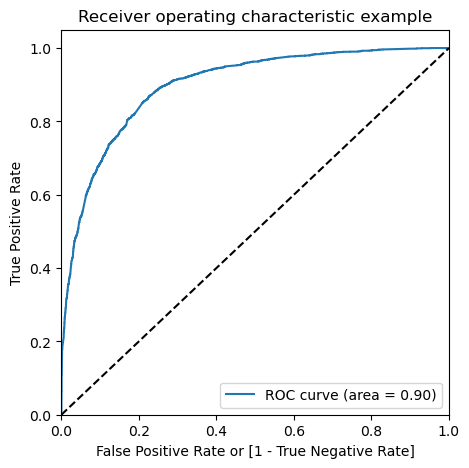

In [84]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

# Finding Optimal Cutoff Point

In [85]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.711154,2240,1,1,1,1,1,1,1,1,1,0,0
1,0,0.501978,113,1,1,1,1,1,1,1,0,0,0,0
2,1,0.719547,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.099219,5573,0,1,0,0,0,0,0,0,0,0,0
4,0,0.018323,1109,0,1,0,0,0,0,0,0,0,0,0


In [86]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.656013  0.970755  0.455158
0.2   0.2  0.768671  0.922827  0.670295
0.3   0.3  0.805538  0.882210  0.756610
0.4   0.4  0.816930  0.785946  0.836703
0.5   0.5  0.819146  0.716084  0.884914
0.6   0.6  0.813133  0.648253  0.918351
0.7   0.7  0.790506  0.543461  0.948160
0.8   0.8  0.767880  0.453290  0.968637
0.9   0.9  0.722785  0.307880  0.987558


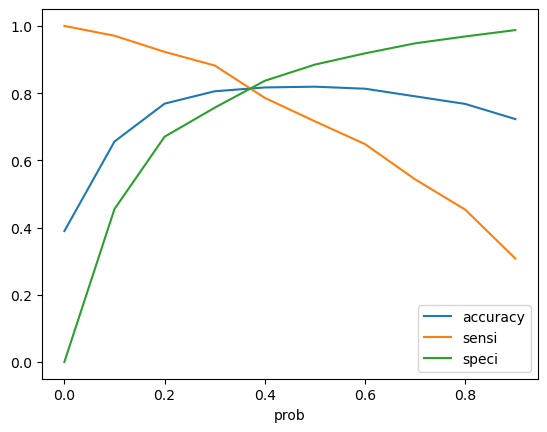

In [87]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [88]:
# Let us make the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.711154,2240,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.501978,113,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.719547,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.099219,5573,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.018323,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [89]:
# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.711154,2240,1,1,1,1,1,1,1,1,1,0,0,1,71
1,0,0.501978,113,1,1,1,1,1,1,1,0,0,0,0,1,50
2,1,0.719547,4132,1,1,1,1,1,1,1,1,1,0,0,1,72
3,0,0.099219,5573,0,1,0,0,0,0,0,0,0,0,0,0,10
4,0,0.018323,1109,0,1,0,0,0,0,0,0,0,0,0,0,2
5,0,0.035218,2282,0,1,0,0,0,0,0,0,0,0,0,0,4
6,1,0.738753,2976,1,1,1,1,1,1,1,1,1,0,0,1,74
7,0,0.449488,8431,0,1,1,1,1,1,0,0,0,0,0,1,45
8,1,0.815157,2770,1,1,1,1,1,1,1,1,1,1,0,1,82
9,1,0.996659,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [90]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1999
0     463
Name: final_predicted, dtype: int64

In [91]:
# check the precentage of final_predicted conversions

1965/float(1965+497)

0.7981316003249391

In [92]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8170886075949367

In [93]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3165,  693],
       [ 463, 1999]], dtype=int64)

In [94]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.8119415109666938

In [95]:
# Let us calculate specificity

TN / float(TN+FP)

0.8203732503888025

In [96]:
# Calculate false postive rate - predicting conversions when leads has not converted

print(FP/ float(TN+FP))

0.1796267496111975


In [97]:
# Positive predictive value 

print (TP / float(TP+FP))

0.7425705794947994


In [98]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8723814773980154


# Metrics - Precision and Recall

In [99]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3414,  444],
       [ 699, 1763]], dtype=int64)

In [100]:
from sklearn.metrics import precision_score, recall_score
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7988219302220209

In [101]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7160844841592201

# Precision and Recall Tradeoff 

In [102]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

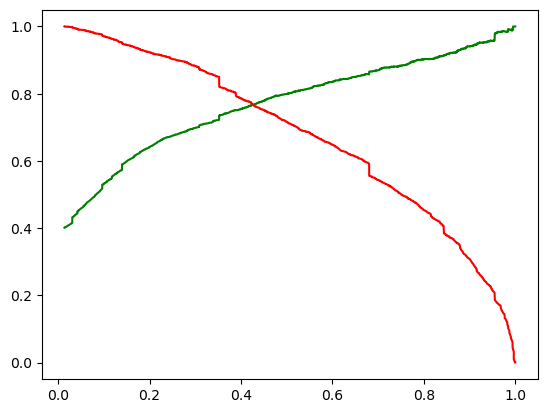

In [103]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Making Predictions on the Test set

In [104]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])
X_test = X_test[col]
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,...,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_Unreachable
2296,0,0,0.1875,0.665313,0.37500,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8697,0,0,0.4375,0.184032,0.21875,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
7378,0,0,0.1250,0.163284,0.25000,0,0,1,0,1,...,1,0,0,0,1,0,0,0,0,0
8631,0,0,0.3125,0.407307,0.62500,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4799,0,0,0.5000,0.744700,1.00000,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [105]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2296    0.918133
8697    0.608900
7378    0.168344
8631    0.565529
4799    0.945745
4503    0.388262
7129    0.868349
1717    0.139520
8398    0.866219
5116    0.308197
dtype: float64

In [106]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head

y_pred_1.head()

,0
2296,0.918133
8697,0.608900
7378,0.168344
8631,0.565529
4799,0.945745


In [107]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.918133
1,0,8697,0.608900
2,0,7378,0.168344
3,0,8631,0.565529
4,1,4799,0.945745


In [108]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,LeadId,Converted_Prob
0,1,2296,0.918133
1,0,8697,0.608900
2,0,7378,0.168344
3,0,8631,0.565529
4,1,4799,0.945745


In [109]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_pred_final.head()

,Converted,LeadId,Converted_Prob,final_predicted
0,1,2296,0.918133,1
1,0,8697,0.608900,1
2,0,7378,0.168344,0
3,0,8631,0.565529,1
4,1,4799,0.945745,1


In [110]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,LeadId,Converted_Prob,final_predicted,lead_score
0,1,2296,0.918133,1,92
1,0,8697,0.608900,1,61
2,0,7378,0.168344,0,17
3,0,8631,0.565529,1,57
4,1,4799,0.945745,1,95
5,0,4503,0.388262,1,39
6,0,7129,0.868349,1,87
7,0,1717,0.139520,0,14
8,0,8398,0.866219,1,87
9,1,5116,0.308197,0,31


In [111]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    811
0    204
Name: final_predicted, dtype: int64

In [112]:
# check the precentage of final_predicted conversions on test data

797/float(797+218)

0.7852216748768472

# Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity on test set

In [113]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8150609080841639

In [114]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1397,  297],
       [ 204,  811]], dtype=int64)

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7990147783251231

In [116]:
# Let us calculate specificity
TN / float(TN+FP)

0.8246753246753247

# Precision and Recall metrics for the test set

In [117]:
# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7319494584837545
recall  0.7990147783251231


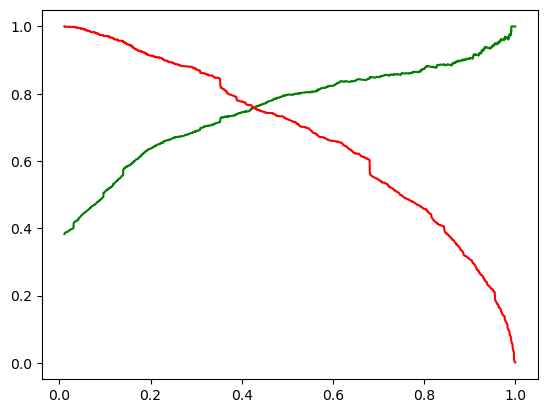

In [118]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()